##### Required library import

In [1]:
import numpy as np
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Question 1

In [2]:
arr = np.linspace(start=0,stop=4*np.pi,num=400)
y1 = np.sin(arr)
y2 = np.cos(arr/2)

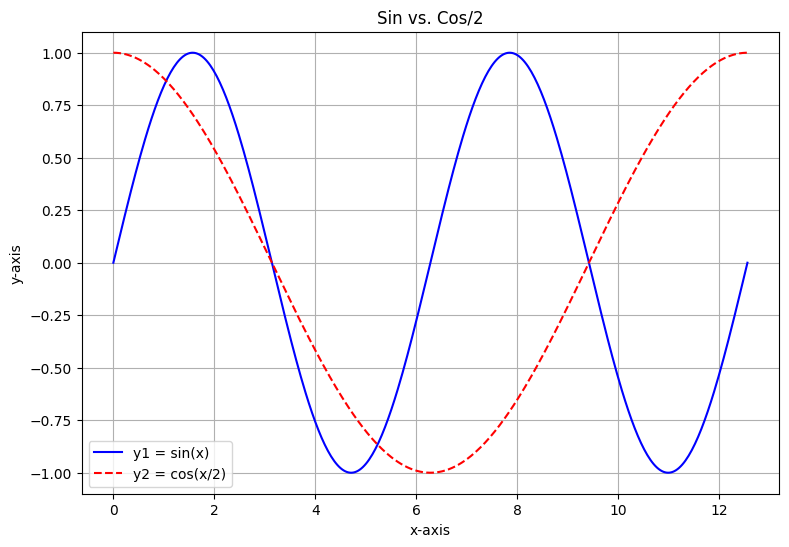

In [3]:
plt.figure(figsize=(9,6))
plt.plot(arr,y1,'b',label='y1 = sin(x)')
plt.plot(arr,y2,'r--',label='y2 = cos(x/2)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Sin vs. Cos/2')
plt.legend()
plt.grid(True)
plt.savefig('sin_vs_cos2.png', dpi=300)
plt.show()

#### Question 2

In [4]:
url_q2 = r'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
response = requests.get(url_q2)
df = pd.read_csv(StringIO(response.text))
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
msl = df.groupby('species')['sepal_length'].mean().round(2)
print("Mean sepal length for each species:")
msl

Mean sepal length for each species:


species
setosa        5.01
versicolor    5.94
virginica     6.59
Name: sepal_length, dtype: float64

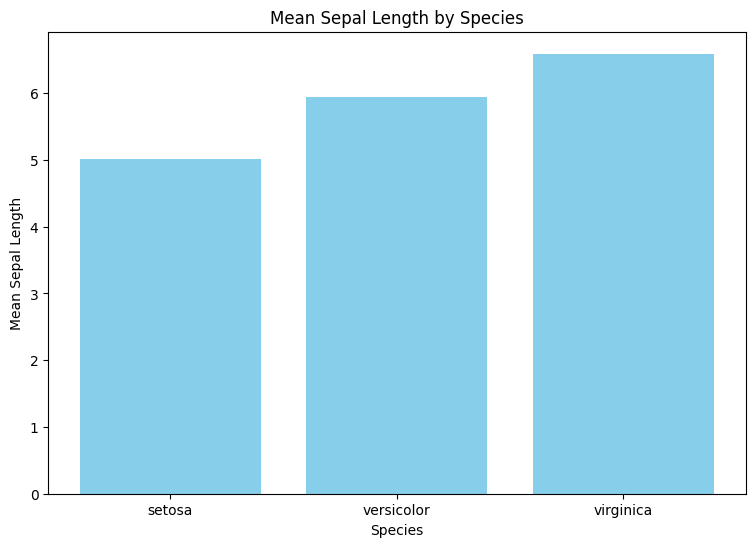

In [6]:
plt.figure(figsize=(9,6))
bars = plt.bar(msl.index,msl.values,color='skyblue')

plt.xlabel('Species')
plt.ylabel('Mean Sepal Length')
plt.title('Mean Sepal Length by Species')
plt.show()

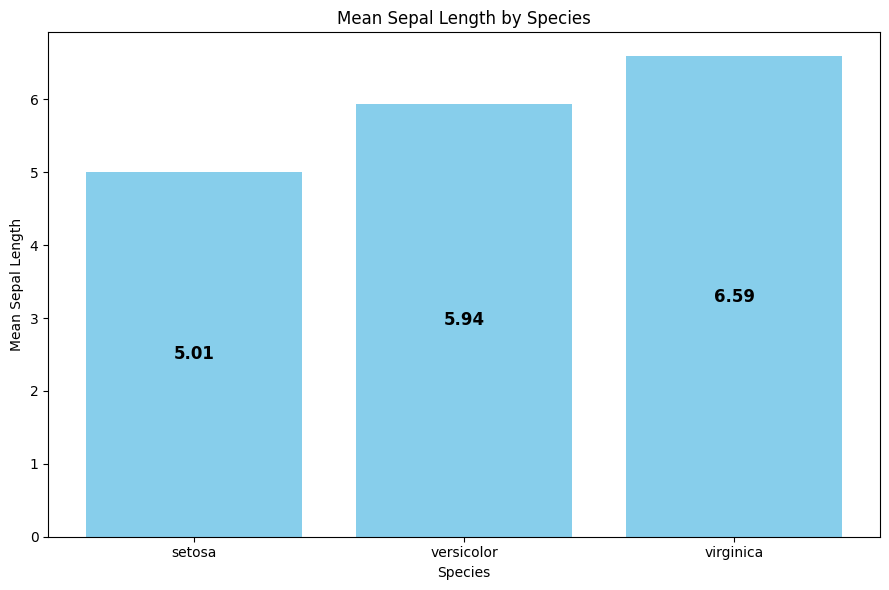

In [7]:
plt.figure(figsize=(9,6))
bars = plt.bar(msl.index,msl.values,color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x()+bar.get_width() / 2,
        height*0.5,f'{height:.2f}',ha='center',va='center',color='black',fontsize=12,fontweight='bold'
    )

plt.xlabel('Species')
plt.ylabel('Mean Sepal Length')
plt.title('Mean Sepal Length by Species')
plt.tight_layout()
plt.show()

#### Question 3

In [8]:
url_q3 = r'https://raw.githubusercontent.com/CarlHatoum/Spotify-TOP-50-songs/master/top50.csv'
response = requests.get(url_q3)
data = pd.read_csv(StringIO(response.text))
data.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Seńorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


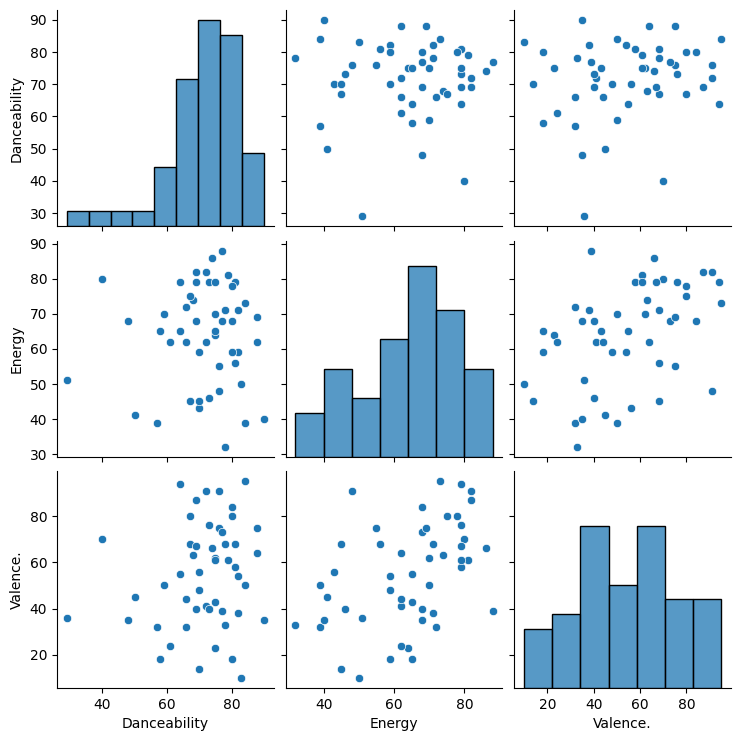

In [9]:
# instrumentalness plot not present in the given dataset hence only used the rest of the mentioned columns for making the plots
sns.pairplot(data[['Danceability','Energy','Valence.']])
plt.show()

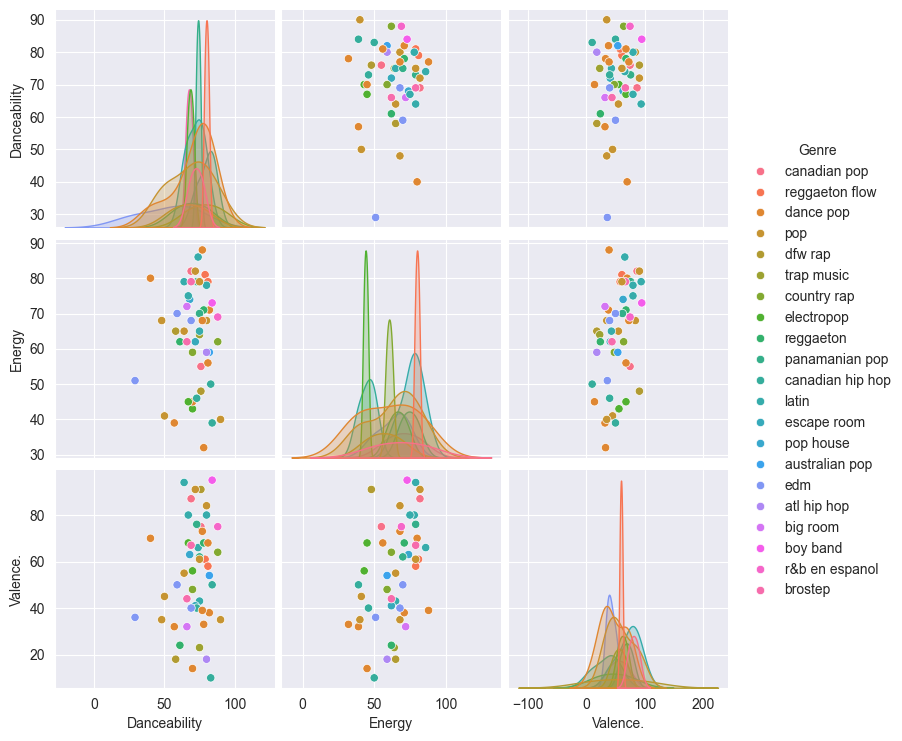

In [10]:
sns.set_style('darkgrid')
sns.pairplot(data,vars=['Danceability','Energy','Valence.'],hue='Genre')
plt.show()

#### Question 4

In [11]:
# Simulating the random throws
np.random.seed(0)
A = np.random.normal(0,1,1000)
B = np.random.normal(2,1.5,1000)

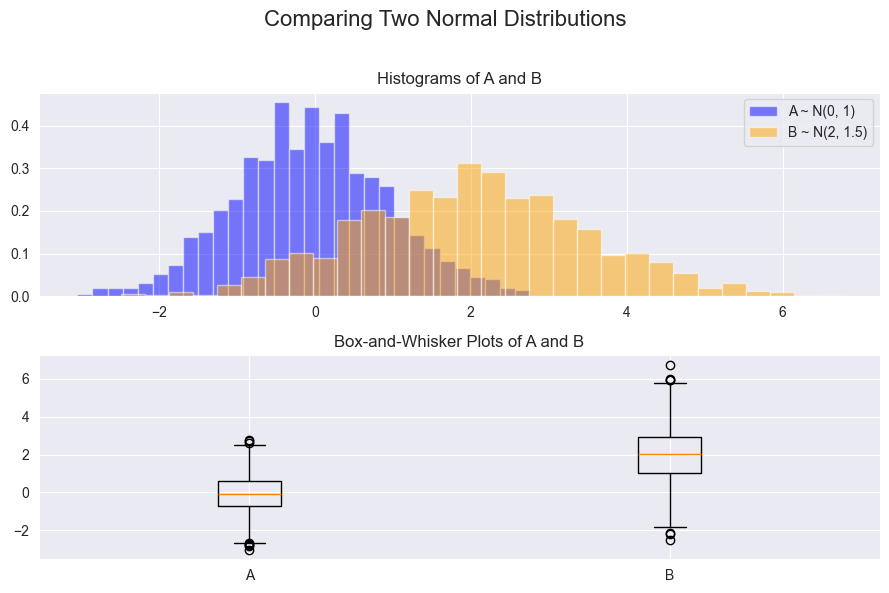

In [12]:
# plotting data
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(9,6))
ax1.hist(A,bins=30,alpha=0.5,label='A ~ N(0, 1)',color='blue',density=True)
ax1.hist(B,bins=30,alpha=0.5,label='B ~ N(2, 1.5)',color='orange',density=True)
ax1.legend()
ax1.set_title("Histograms of A and B")

ax2.boxplot([A, B],tick_labels=['A','B'])
ax2.set_title("Box-and-Whisker Plots of A and B")

fig.suptitle("Comparing Two Normal Distributions",fontsize=16)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

#### Question 5

In [13]:
# Fetching data
gm = px.data.gapminder()
gm.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [14]:
# a) Filter the dataframe to the year 2007
gm_f = gm[gm['year']==2007]
gm_f.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [15]:
# b) Compute average life expectancy and GDP per capita for each continent
continent_stats = gm_f.groupby('continent')[['lifeExp', 'gdpPercap']].mean()
continent_stats

,lifeExp,gdpPercap
continent,,
Africa,54.806038,3089.032605
Americas,73.608120,11003.031625
Asia,70.728485,12473.026870
Europe,77.648600,25054.481636
Oceania,80.719500,29810.188275


In [16]:
# c & d) Create interactive bubble chart with animation control for years
fig = px.scatter(gm, x="gdpPercap", y="lifeExp",size="pop", color="continent",hover_name="country",animation_frame="year", animation_group="country",
    size_max=60, log_x=True,range_x=[100,100000],range_y=[20,90],title="GDP per Capita v/s Life Expectancy"
)
fig.update_layout(xaxis_title="GDP per Capita (log scale)", yaxis_title="Life Expectancy", legend_title="Continent")
fig.show()